✅ Variables de entorno (.env) cargadas.
✅ Entorno configurado correctamente (PROJ: c:\Users\mosqu\.conda\envs\tfm_env\Library\share\proj)
Test de variables: Usuario=postgres, DB=tfm_arousa_db
✅ Conexión a BD: ÉXITO


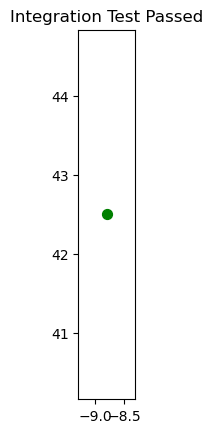

✅ Gráfico generado: ÉXITO (Kernel estable)


In [1]:
# 1. Importación
import sys
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Añadir raíz al path para poder importar src
sys.path.append(os.path.abspath(".."))

# Importar tu módulo maestro
from src.config_env import inicializar_entorno

# 2. Ejecutar configuración (Aquí debería salir el ✅ del print)
inicializar_entorno()

# 3. Prueba rápida de fuego (Leer variables cargadas por la función)
DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_HOST = os.getenv("DB_HOST")
DB_NAME = os.getenv("DB_NAME")

print(f"Test de variables: Usuario={DB_USER}, DB={DB_NAME}")

# 4. Prueba de conexión + Gráfico (Para confirmar que el parche DLL funciona)
if DB_PASS:
    engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:5432/{DB_NAME}")
    sql = "SELECT * FROM test_conexion"
    try:
        gdf = gpd.read_postgis(sql, engine, geom_col='geometry')
        print("✅ Conexión a BD: ÉXITO")
        
        # Plot simple para ver si explota el kernel
        gdf.plot(color='green', markersize=50)
        plt.title("Integration Test Passed")
        plt.show()
        print("✅ Gráfico generado: ÉXITO (Kernel estable)")
    except Exception as e:
        print(f"❌ Fallo en la prueba: {e}")